## Importing dependencies

In [6]:
import os.path
import numpy as np                                       
import pandas as pd                                      
import csv
import seaborn as sns
from sklearn.model_selection import train_test_split 
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import style
sns.set(style="ticks", color_codes=True)
style.use('ggplot')
%matplotlib inline

## Getting the data

In [7]:
if not os.path.exists('/home/yatin/Downloads/data_new.csv'):
    old = open('/home/yatin/Downloads/data.csv','r')
    data = open('/home/yatin/Downloads/data_new.csv','x')
    writer = csv.writer(data)
    for n,row in enumerate (csv.reader(old)):
        if (n>14):
            writer.writerow(row)
    old.close()
    data.close()

data = pd.read_csv('/home/yatin/Downloads/data_new.csv',names = ['FLength', 'FWidth', 'FSize', 'FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist','Class'])
data.head()

,FLength,FWidth,FSize,FConc,FConc1,FAsym,FM3Long,FM3Trans,FAlpha,FDist,Class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## Preparing the data

$\large data= \frac{data-mean(data)}{std(data)}$ # Normalizing 

$\large data= \frac{data-min(data)}{max(data)-min(data)}$   # Standardization

In [8]:
style.use('ggplot')
features=['FLength', 'FWidth', 'FSize', 'FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist']  
for c in features: 
    data[''+str(c)]= (data[''+str(c)] - data[''+str(c)].mean())/ data[''+str(c)].std()                        # Standerdizing
    data[''+str(c)]= (data[''+str(c)] - min(data[''+str(c)]))/ (max(data[''+str(c)])-min(data[''+str(c)]))    # Normalization
data.head(4)

,FLength,FWidth,FSize,FConc,FConc1,FAsym,FM3Long,FM3Trans,FAlpha,FDist,Class
0,0.074306,0.062415,0.208043,0.430390,0.293229,0.470032,0.620576,0.512493,0.445467,0.163066,g
1,0.082815,0.045727,0.170668,0.587794,0.558601,0.468649,0.623756,0.507944,0.070677,0.412679,g
2,0.478241,0.530579,0.626818,0.027617,0.027263,0.556215,0.468201,0.416540,0.855111,0.516926,g
3,0.059212,0.037338,0.117445,0.683714,0.580679,0.469558,0.570630,0.515219,0.116100,0.233582,g


In [9]:
x = data.loc[:,['FLength', 'FWidth', 'FSize', 'FConc', 'FConc1', 'FAsym', 'FM3Long', 'FM3Trans', 'FAlpha', 'FDist']]
x.insert(0, 'ones', np.ones((data.shape[0],1)))
x = np.array(x)

y = data.loc[:,['Class']]
y = np.array(y)
for i in range(y.shape[0]) :
    if (y[i] == 'h'):
        y[i] = 0
    else :
        y[i] = 1

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)
# print(x)
# print(y)
# x_train.shape, x_test.shape, y_train.shape, y_test.shape

## Visualising the data

### Miscellanous

In [10]:
# pd.melt?
# sns.violinplot?
# sns.distplot?
# sns.heatmap?
# data.plot.hist?
# plt.subplots?
# sns.pairplot?
# 1. fLength:   major axis of ellipse 
# 2. fWidth:    minor axis of ellipse 
# 3. fSize:     10-log of sum of content of all pixels 
# 4. fConc:     ratio of sum of two highest pixels over fSize 
# 5. fConc1:    ratio of highest pixel over fSize 
# 6. fAsym:     distance from highest pixel to center, projected onto major axis 
# 7. fM3Long:   3rd root of third moment along major axis 
# 8. fM3Trans:  3rd root of third moment along minor axis 
# 9. fAlpha:    angle of major axis with vector to origin 
# 10. fDist:    distance from origin to center of ellipse

In [11]:
data.describe()

,FLength,FWidth,FSize,FConc,FConc1,FAsym,FM3Long,FM3Trans,FAlpha,FDist
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,0.148432,0.086515,0.261300,0.417351,0.317613,0.439028,0.600465,0.534405,0.307175,0.389528
std,0.128420,0.071558,0.139739,0.207766,0.163744,0.057306,0.089458,0.053993,0.290040,0.151194
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.060785,0.046274,0.158427,0.253097,0.189917,0.423294,0.559440,0.505632,0.061644,0.285688
50%,0.099621,0.066853,0.236044,0.387601,0.290710,0.447105,0.608829,0.535485,0.196439,0.385550
75%,0.199576,0.096495,0.343081,0.557563,0.422174,0.466512,0.644829,0.562135,0.509817,0.484102
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
FLength     19020 non-null float64
FWidth      19020 non-null float64
FSize       19020 non-null float64
FConc       19020 non-null float64
FConc1      19020 non-null float64
FAsym       19020 non-null float64
FM3Long     19020 non-null float64
FM3Trans    19020 non-null float64
FAlpha      19020 non-null float64
FDist       19020 non-null float64
Class       19020 non-null object
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


g    12332
h     6688
Name: Class, dtype: int64


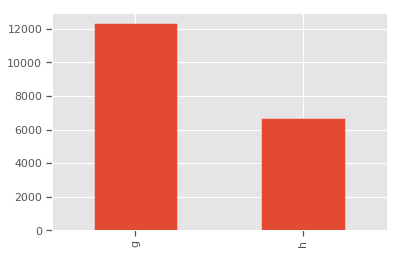

In [13]:
style.use('ggplot')
print(data['Class'].value_counts())
data['Class'].value_counts().plot.bar(x='Class',y='number of instances')

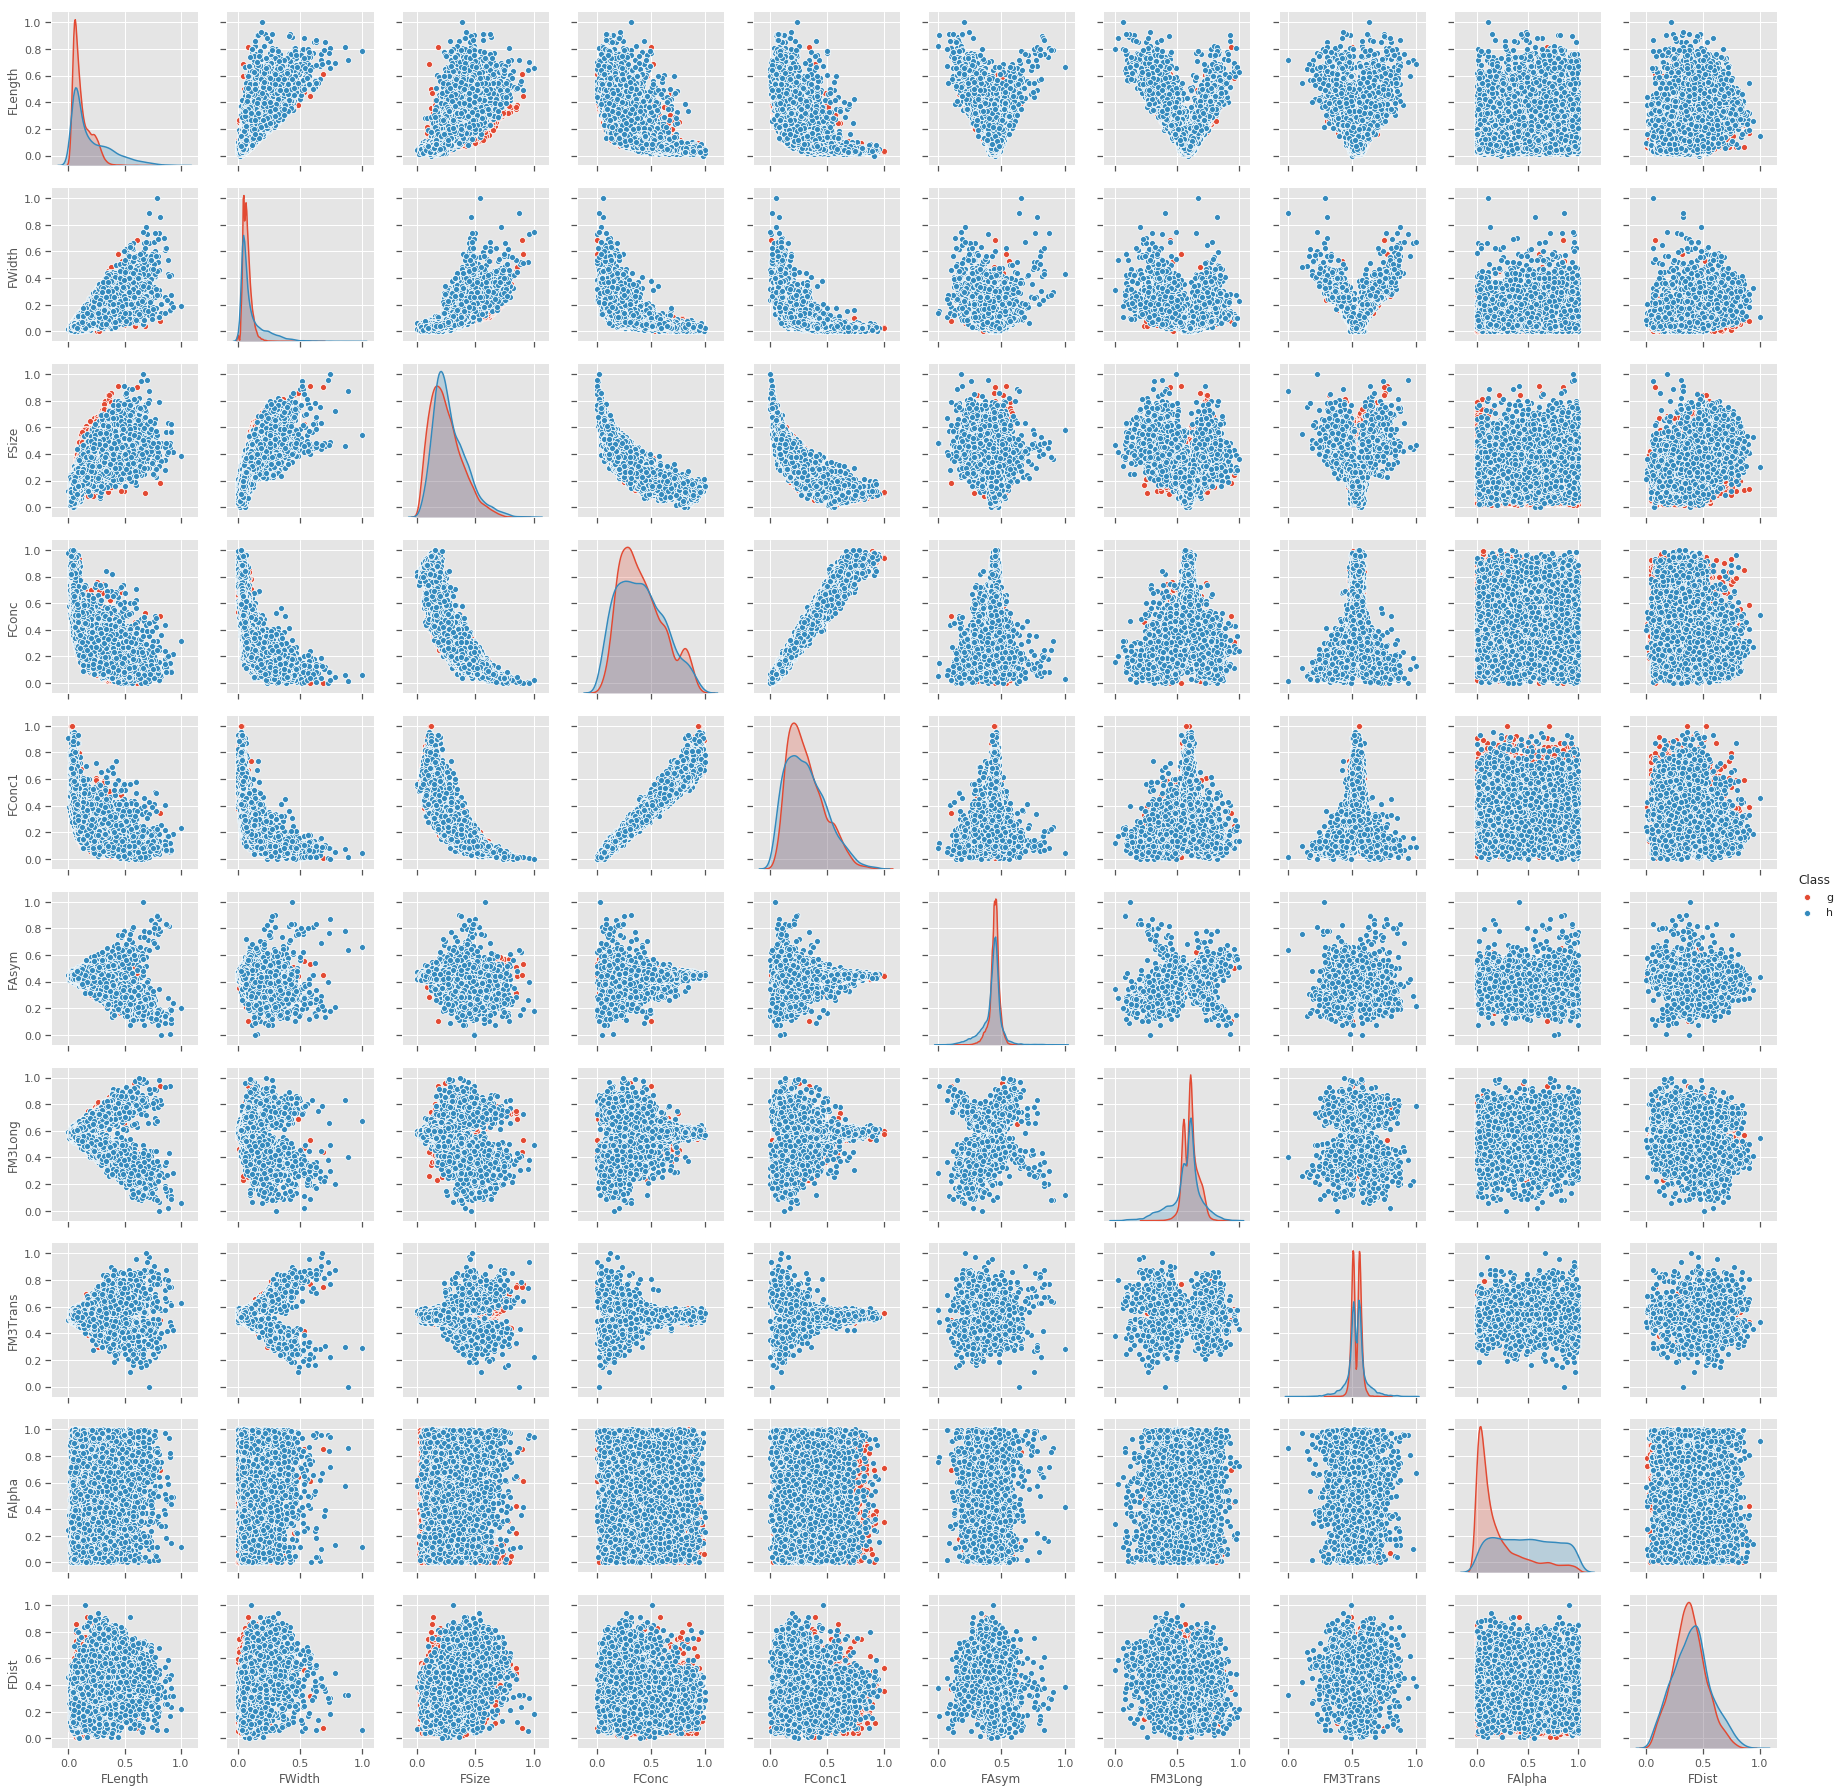

In [14]:
sns.pairplot(data,hue='Class',kind='scatter')

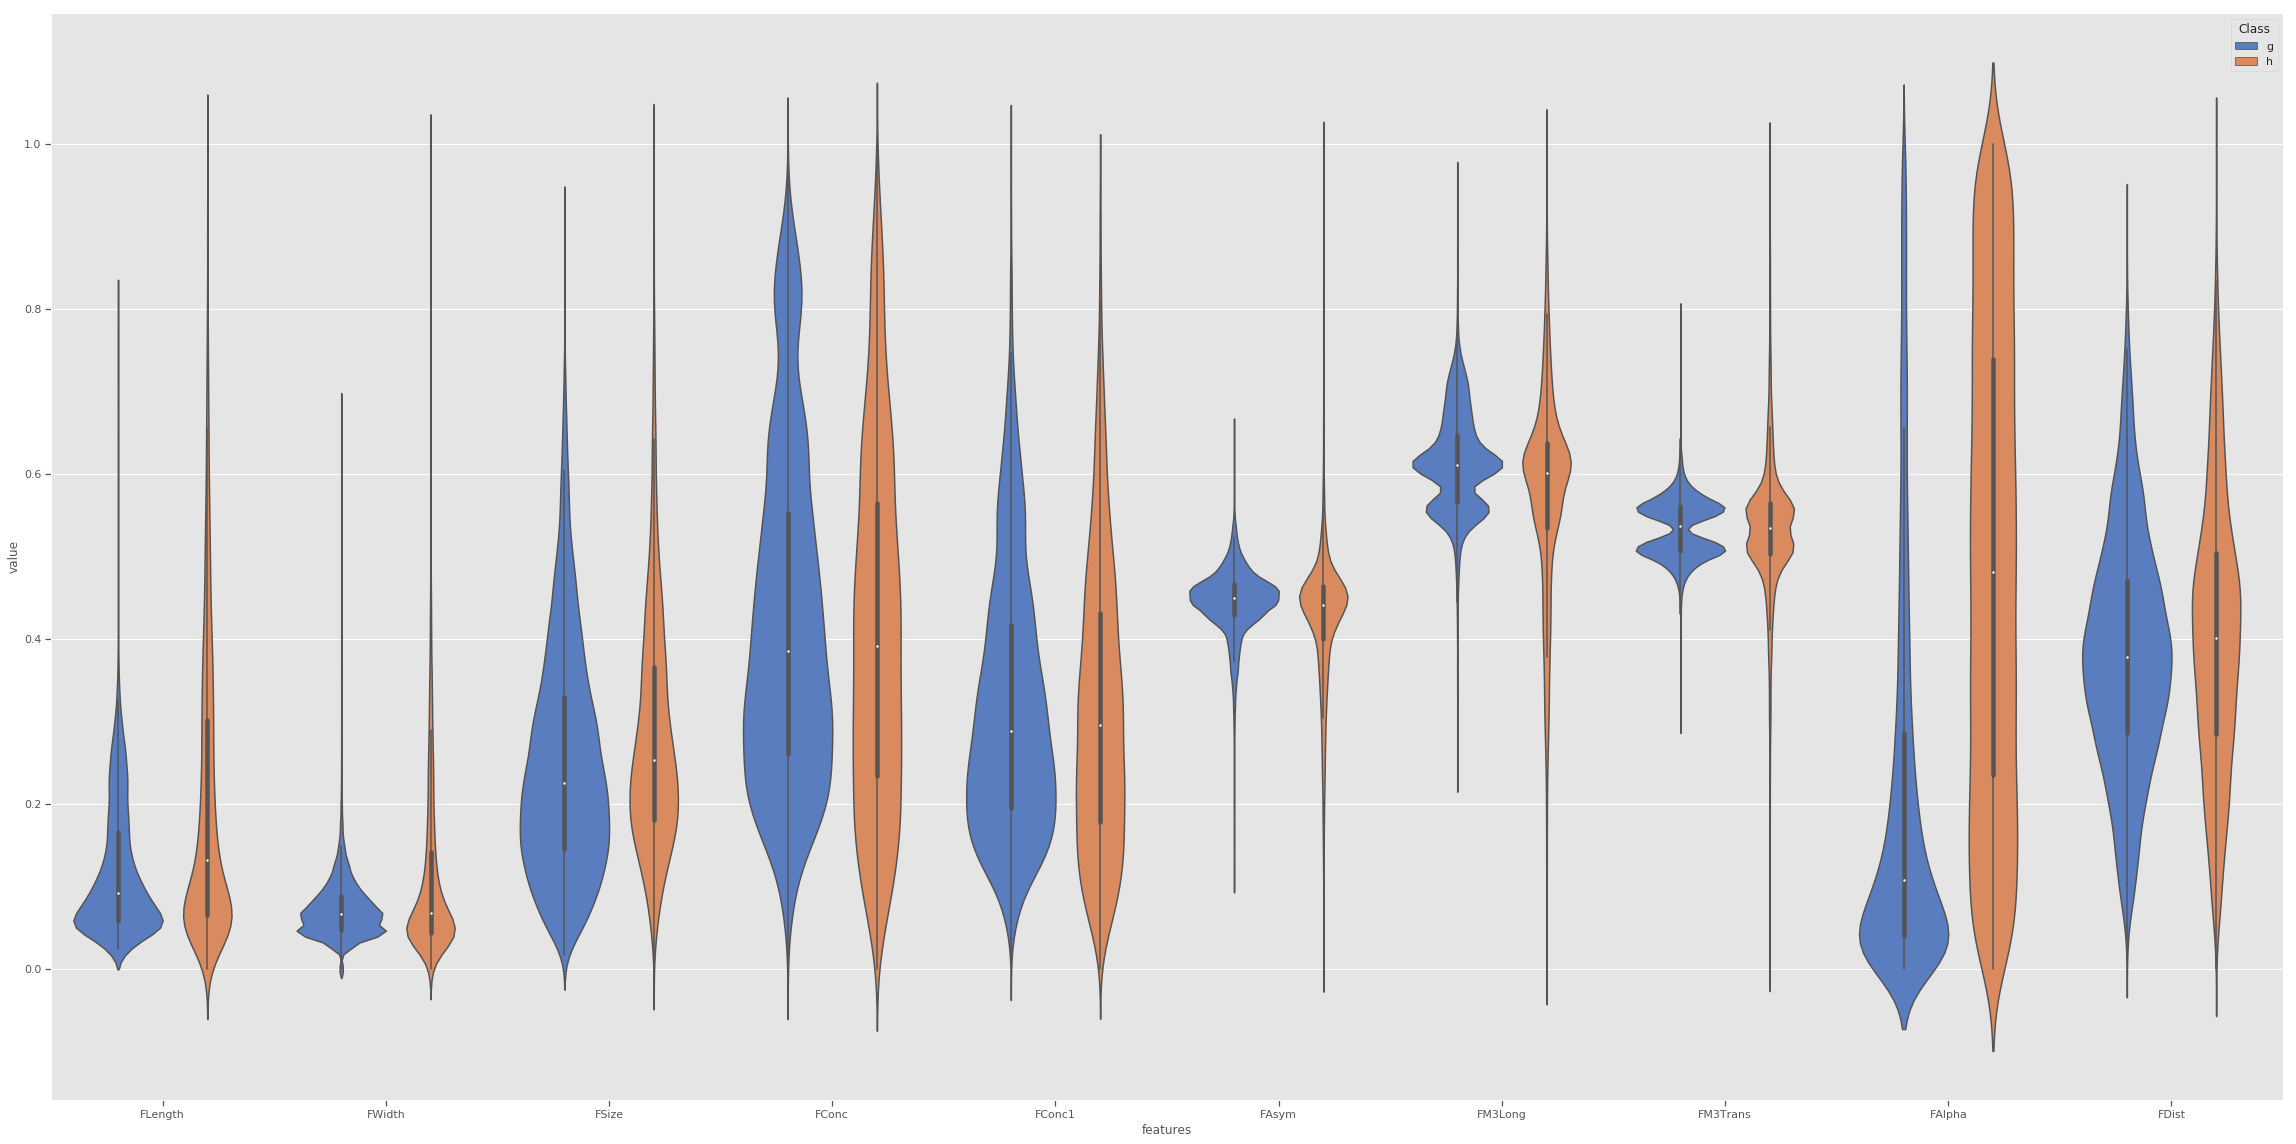

In [15]:
data_2 = pd.melt(data,id_vars='Class',var_name='features',value_name='value')
figure(figsize=(40, 20))
sns.violinplot(x='features',y='value',hue='Class', data=data_2, palette='muted',split=False,scale='count')

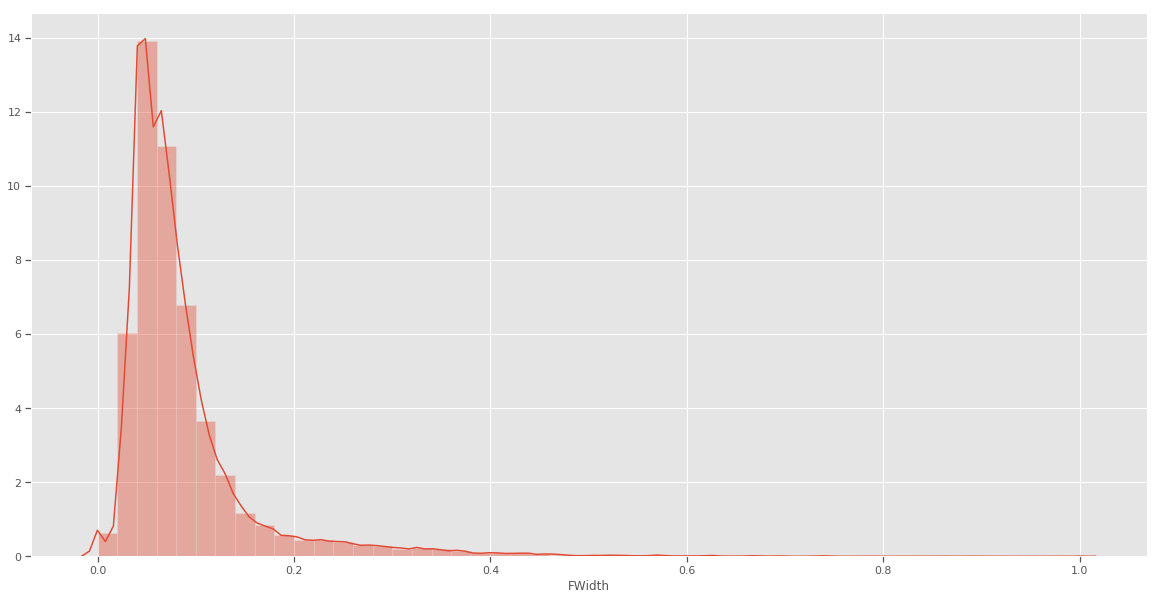

In [16]:
figure(figsize=(20, 10))
sns.distplot(data['FWidth'],norm_hist=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8584209710>,
      dtype=object)

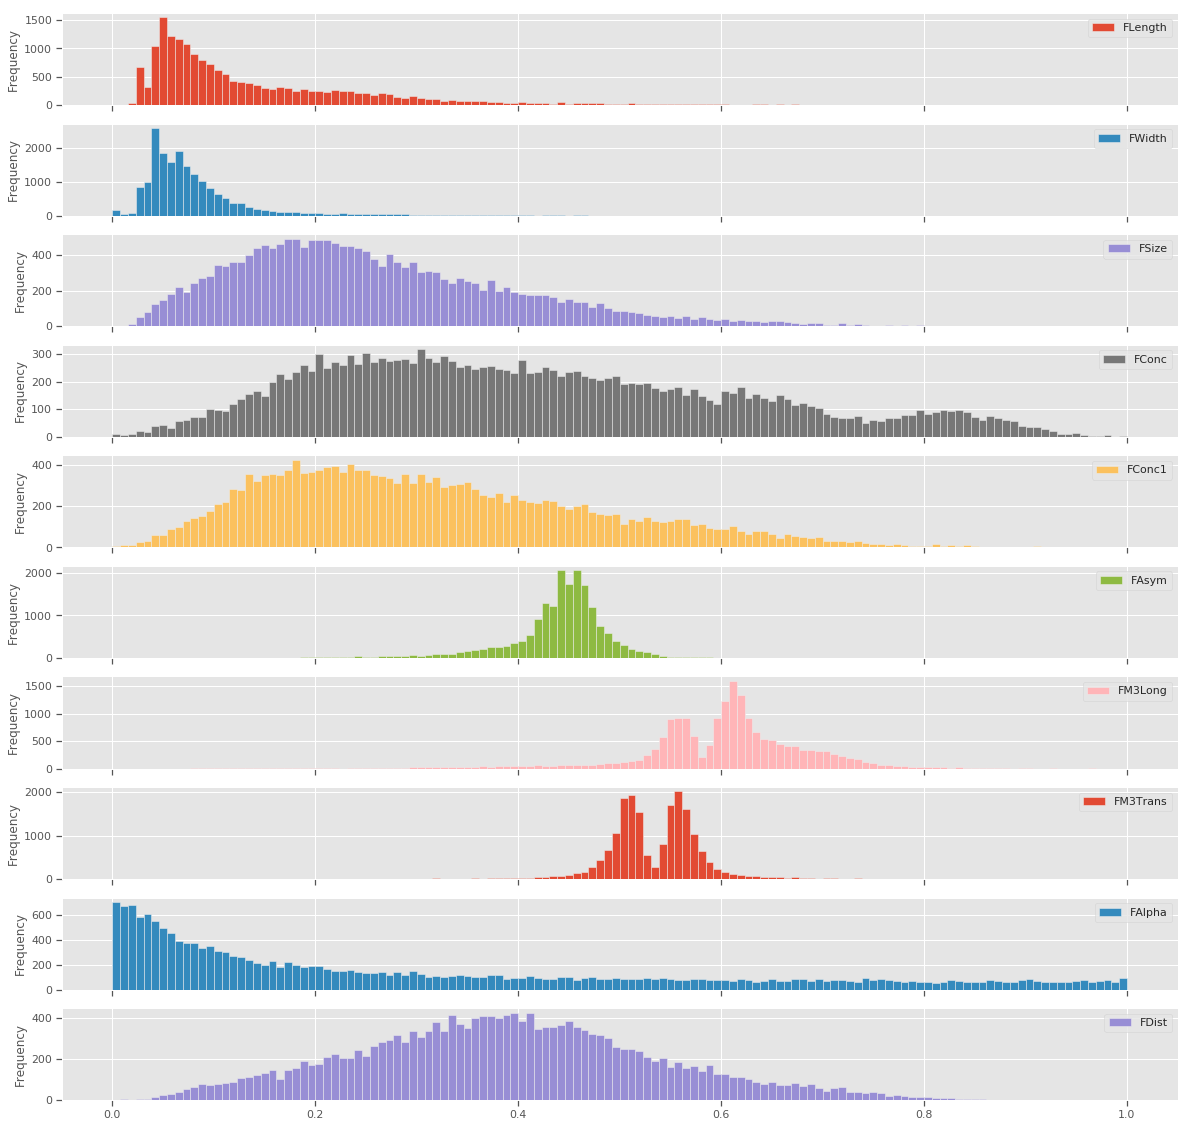

In [17]:

data.plot.hist(subplots=True, figsize=(20,20), bins=130,by='Class')

### Boxplots

In [18]:
# sns.boxplot?

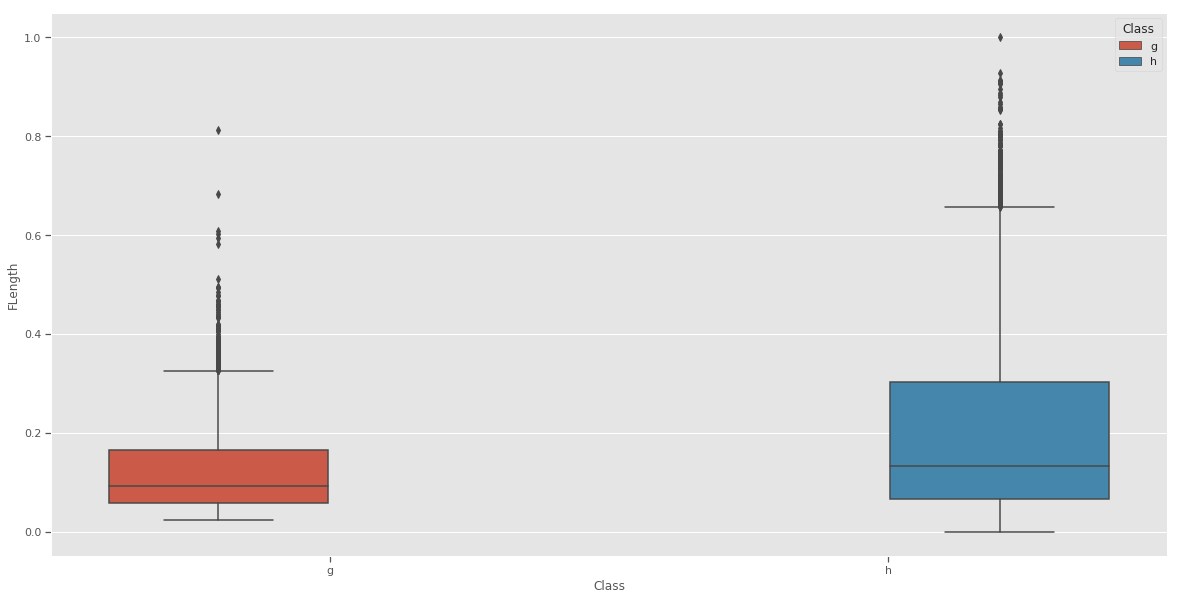

In [19]:
figure(figsize=(20,10))
sns.boxplot(x='Class',y='FLength',data=data,hue=data['Class'])

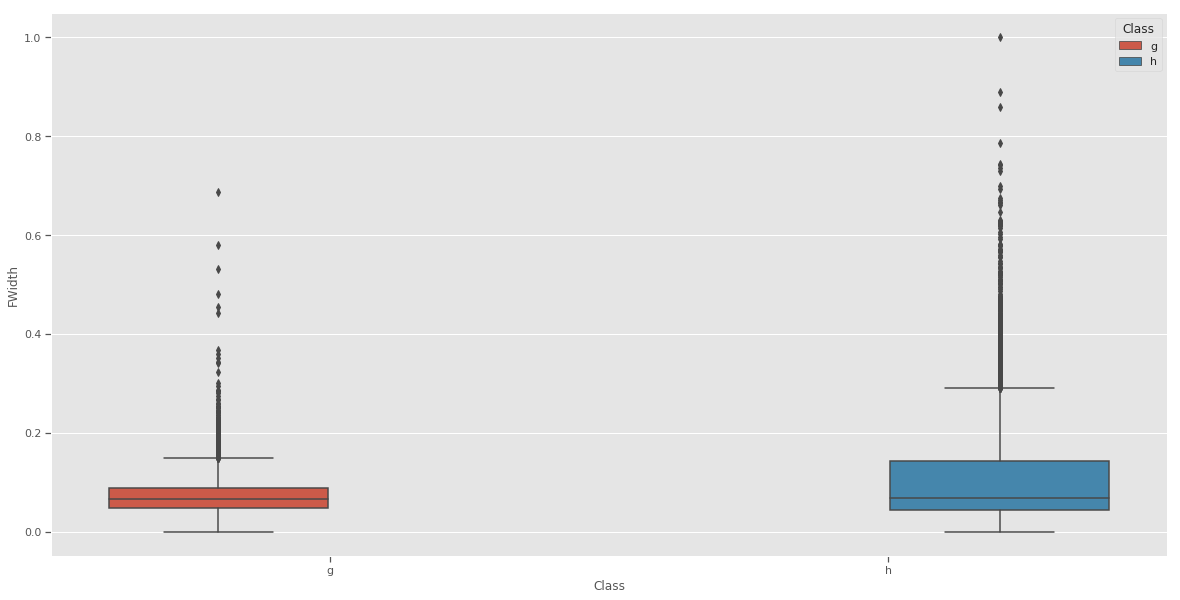

In [20]:
figure(figsize=(20,10))
sns.boxplot(x='Class',y='FWidth',data=data,hue=data['Class'])

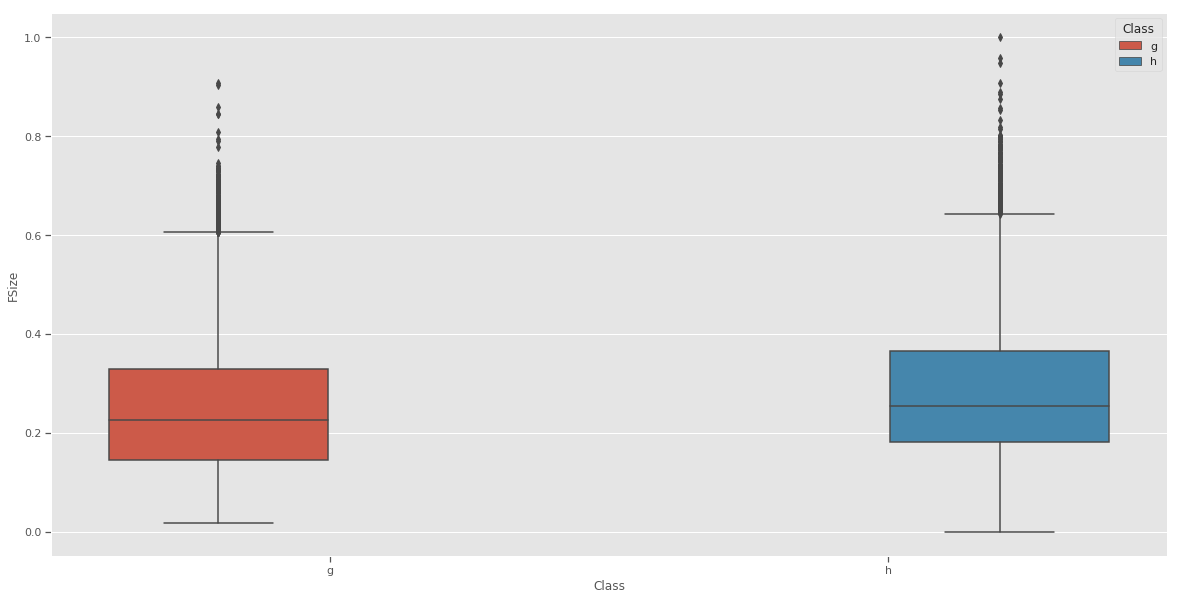

In [21]:
figure(figsize=(20,10))
sns.boxplot(x='Class',y='FSize',data=data,hue=data['Class'])

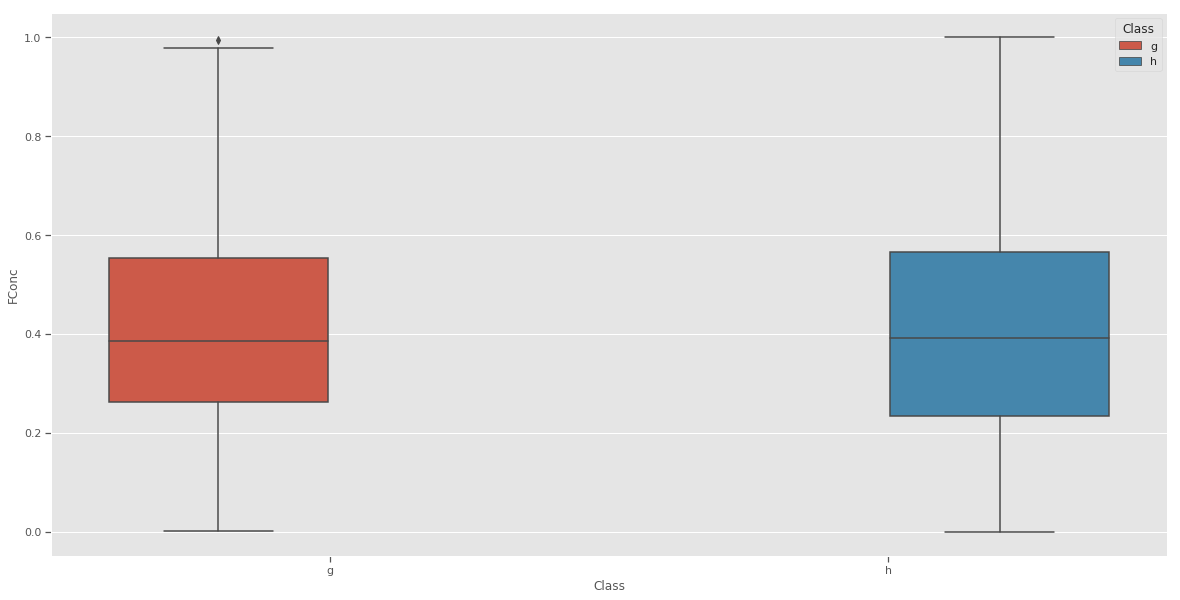

In [22]:
figure(figsize=(20,10))
sns.boxplot(x='Class',y='FConc',data=data,hue=data['Class'])

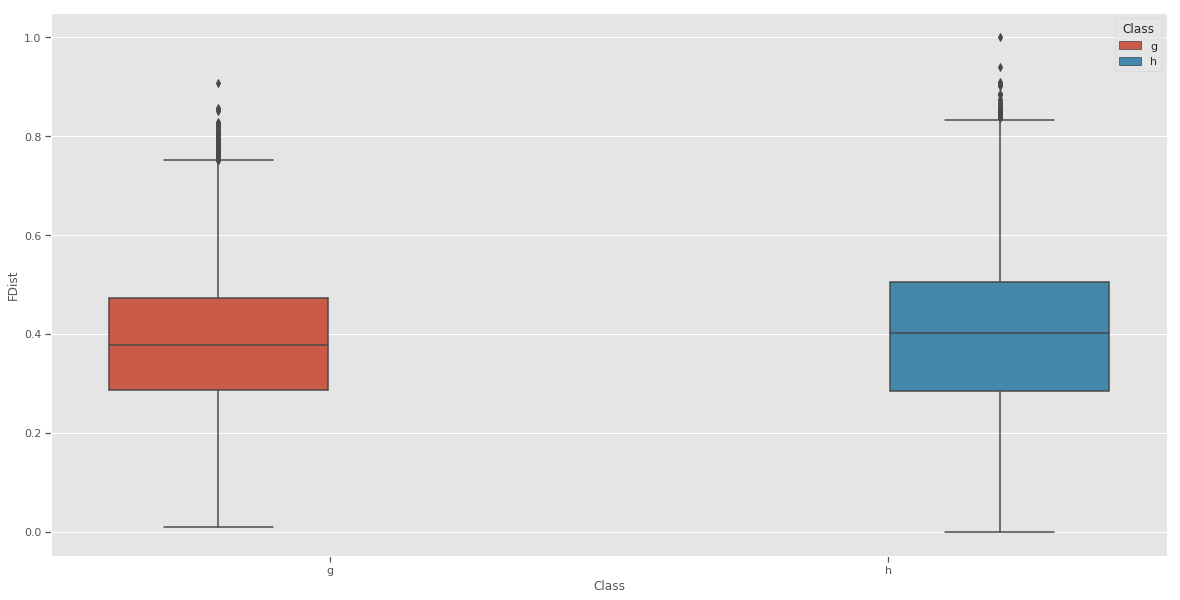

In [23]:
figure(figsize=(20,10))
sns.boxplot(x='Class',y='FDist',data=data,hue=data['Class'])

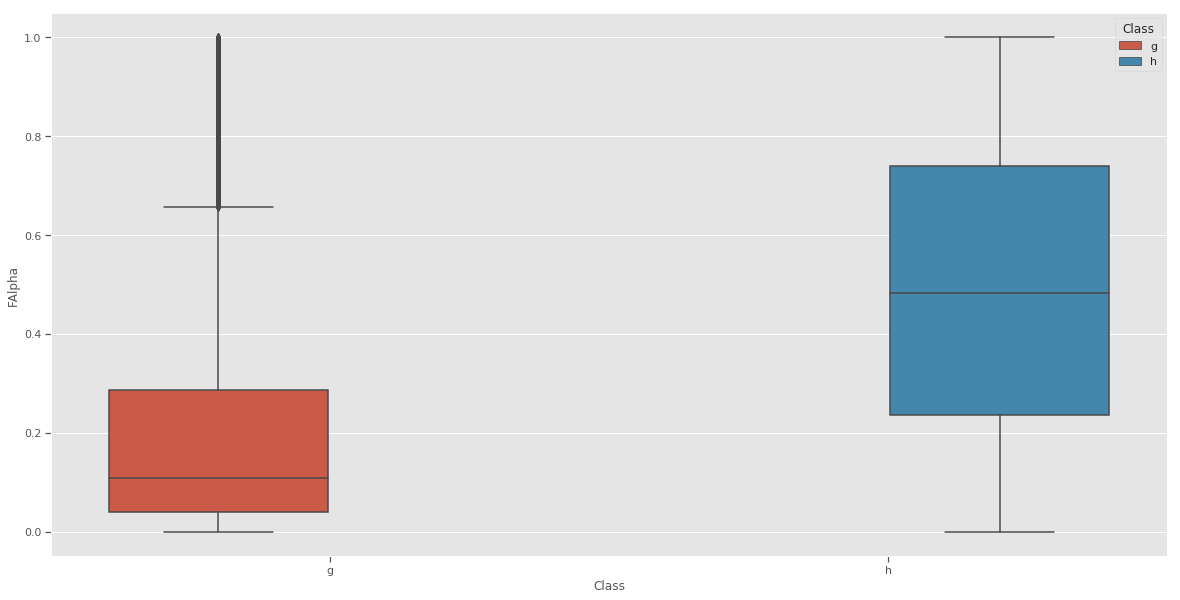

In [24]:
figure(figsize=(20,10))
sns.boxplot(x='Class',y='FAlpha',data=data,hue=data['Class'])

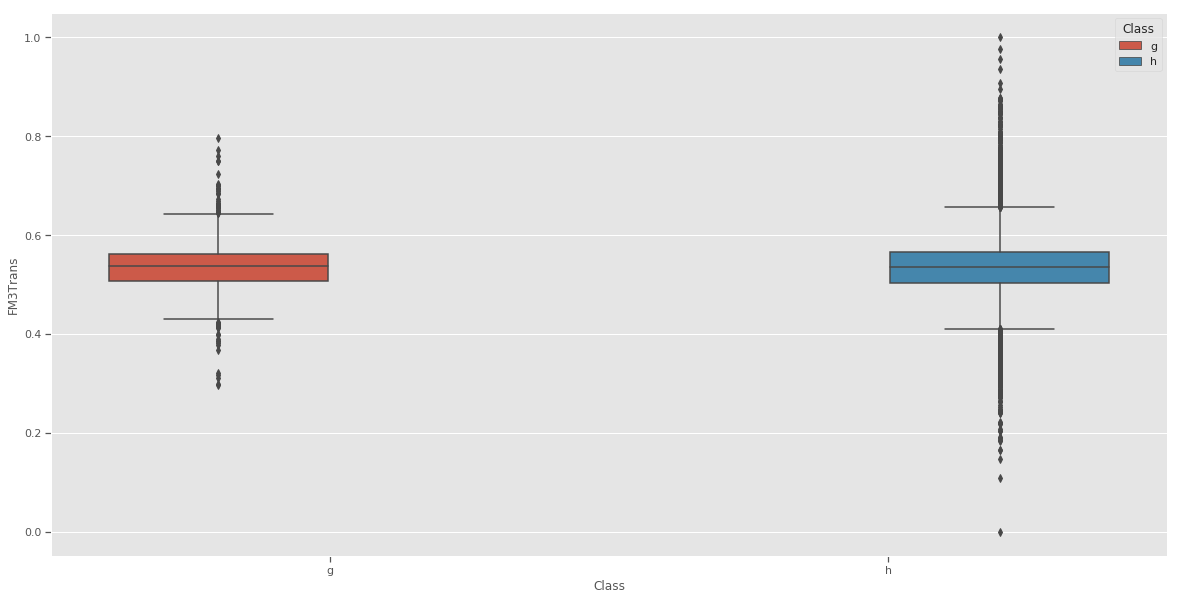

In [25]:
figure(figsize=(20,10))
sns.boxplot(x='Class',y='FM3Trans',data=data,hue=data['Class'])

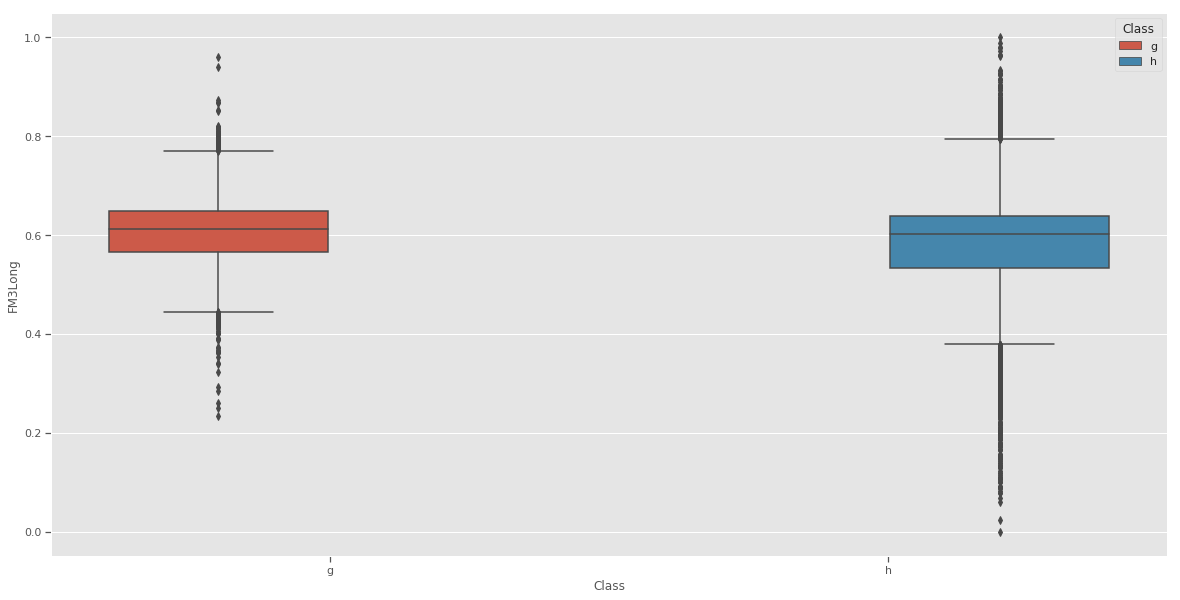

In [26]:
figure(figsize=(20,10))
sns.boxplot(x='Class',y='FM3Long',data=data,hue=data['Class'])

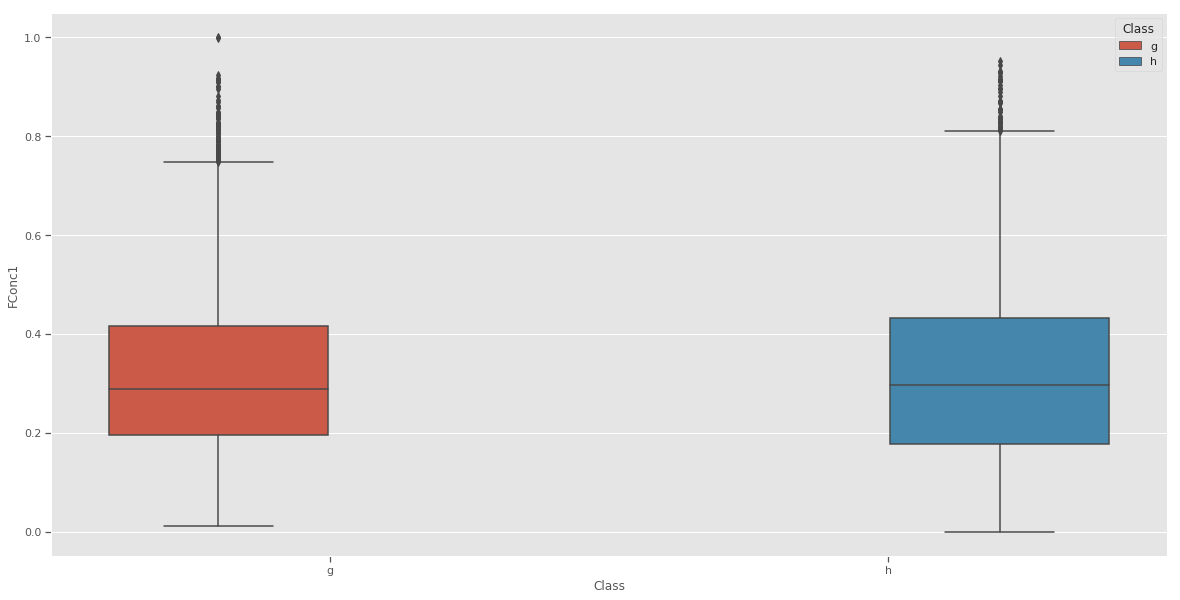

In [27]:
figure(figsize=(20,10))
sns.boxplot(x='Class',y='FConc1',data=data,hue=data['Class'])

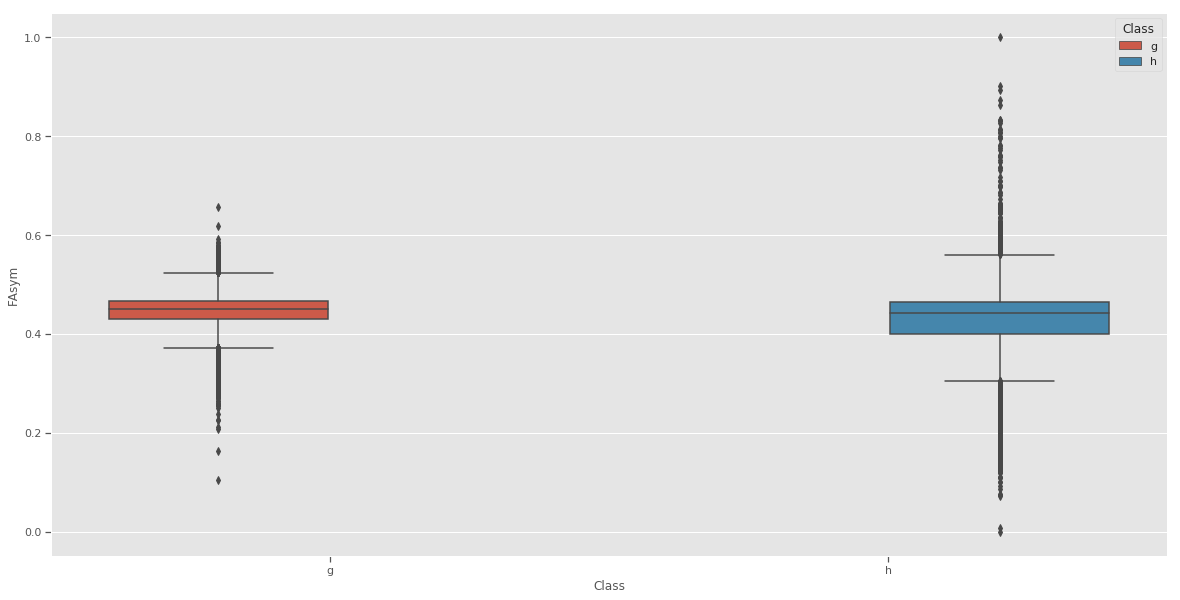

In [28]:
figure(figsize=(20,10))
sns.boxplot(x='Class',y='FAsym',data=data,hue=data['Class'])

## Functions for logistic regression

$\large Cost = -\frac{1}{m}\sum_{i=1}^m(-y\times log(h(x))+(1-y)\times log(1-h(x)))$

$\large\theta = \theta_j-\frac{\alpha}{m}\sum_{i=1}^m (h(x)-y)x_j$


In [29]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def fit(x,y,itera,alpha,print_cost=False):
    
    theta = np.zeros((x.shape[1],1))
    costs=[]
    
    for i in range(itera):
        z=np.array(np.dot(x,theta),dtype=np.float32)
        hypothesis = sigmoid(z)
        cost = -np.sum(np.multiply(y,np.log(hypothesis))+np.multiply(1-y,np.log(1-hypothesis)))/x.shape[0]
        costs.append(cost)
        
        if (print_cost and (i % 100 == 0)):
            print('Cost after iteration %i : %f'%(i,cost))
            
        gradient = np.dot(x.T,(hypothesis-y))/x.shape[0]
        theta = theta - alpha*gradient
        
    print('The final cost :',cost)
    return theta,costs

def predict(x,y,theta):
    z=np.array(np.dot(x,theta),dtype=np.float32)
    prediction = sigmoid(z)
    for i in range(prediction.shape[0]):
        if (prediction[i]>=0.5):
            prediction[i]=1
        else:
            prediction[i]=0
    return prediction

def accuracy_score(prediction,actual):
    correct=0
    for i in range(actual.shape[0]):
        if prediction[i]== actual[i]:
            correct+=1
    return correct*100/actual.shape[0]

## Testing logistic regression

Cost after iteration 0 : 0.693147
Cost after iteration 100 : 0.508168
Cost after iteration 200 : 0.487528
Cost after iteration 300 : 0.478879
Cost after iteration 400 : 0.473583
Cost after iteration 500 : 0.469857
Cost after iteration 600 : 0.467063
Cost after iteration 700 : 0.464886
Cost after iteration 800 : 0.463145
Cost after iteration 900 : 0.461723
Cost after iteration 1000 : 0.460544
Cost after iteration 1100 : 0.459554
Cost after iteration 1200 : 0.458716
Cost after iteration 1300 : 0.458000
Cost after iteration 1400 : 0.457384
Cost after iteration 1500 : 0.456852
Cost after iteration 1600 : 0.456390
Cost after iteration 1700 : 0.455987
Cost after iteration 1800 : 0.455634
Cost after iteration 1900 : 0.455324
Cost after iteration 2000 : 0.455052
Cost after iteration 2100 : 0.454811
Cost after iteration 2200 : 0.454597
Cost after iteration 2300 : 0.454408
Cost after iteration 2400 : 0.454239
Cost after iteration 2500 : 0.454088
Cost after iteration 2600 : 0.453953
Cost after it

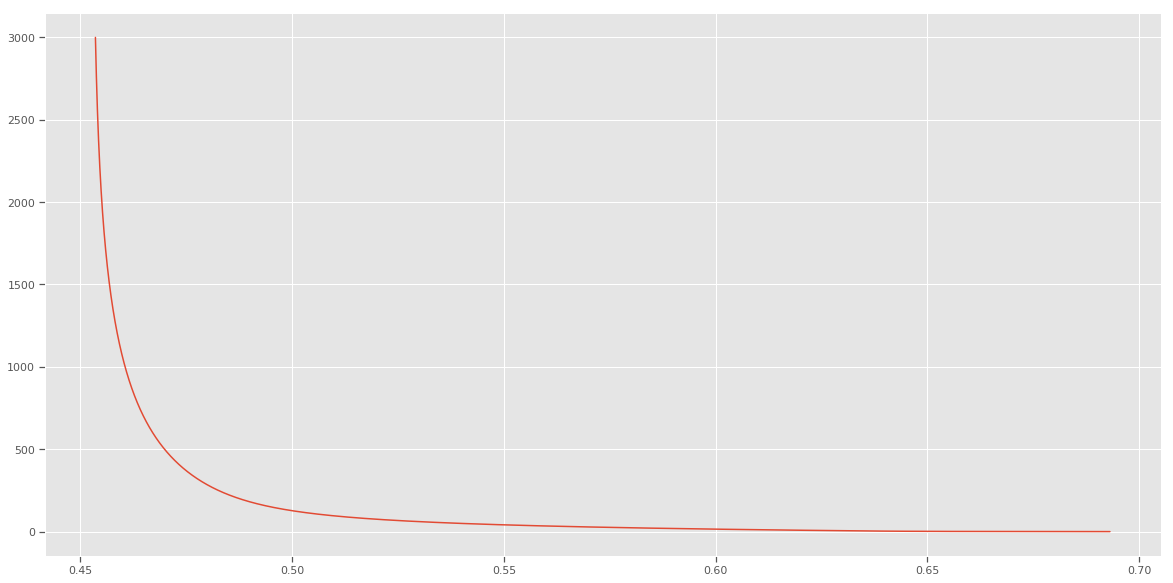


Accuracy with training data:  79.14225627159381
Accuracy with testing data:  78.47879425166491


In [30]:

itera,alpha = 3000,0.9
theta,costs = fit(x_train,y_train,itera,alpha,print_cost=True)

figure(figsize=(20,10))
sns.lineplot(x=costs,y=np.arange(itera))
plt.show()

prediction  = predict(x_train,y_train,theta)
accuracy_score_train = accuracy_score(prediction,y_train)
print("\nAccuracy with training data: ",accuracy_score_train)

prediction  = predict(x_test,y_test,theta)
accuracy_score_test  = accuracy_score(prediction,y_test)
print("Accuracy with testing data: ",accuracy_score_test)